# Počítačové zpracování signálu
## KI/PZS

## Co je signál
- **Signál = nositel informace** (časově proměnná veličina, která něco popisuje).
- Může být:
  - **deterministický** (dá se přesně popsat matematickou funkcí, např. sinus)
  - **náhodný (stochastický)** (obsahuje šum, nelze přesně předpovědět)

---

## Příklady signálů
- **Technika**: zvuk, obraz, rádiová vlna, napětí na vodiči
- **Medicína**:
  - **EKG** (elektrická aktivita srdce)
  - **EEG** (mozková aktivita)
  - **EMG** (aktivita svalů)
  - **CT / MRI** signály → rekonstruovaný obraz
- **Přírodní jevy**: teplota, tlak, seizmické vlny

---

## Parametry signálu
- **Amplituda (A)** – velikost vychýlení (maximální hodnota)
- **Frekvence (f)** – kolikrát za sekundu proběhne perioda [Hz]
- **Perioda (T)** – doba jedné periody (T = 1/f)
- **Úhlová frekvence (ω)** – ω = 2πf [rad/s]
- **Fáze (φ)** – posunutí signálu v čase
- **Obálka signálu** – „vrchní čára“ u modulovaných signálů
- **Spektrum** – rozklad signálu na frekvenční složky (Fourierova transformace)

---

## Zápis signálů – funkce
- **Sinusový signál**:
 `x(t) = A * sin(2π f t + φ)`
- **Kosinusový signál**:
  `x(t) = A * cos(2π f t + φ)`
- **Obecně**: kombinace sinusů + šumu = libovolný signál

### Nosná vlna (carrier)
- sinusový signál s vyšší frekvencí  
- „prázdný nosič“, do kterého se vkládá informace  
- předpis:  
  `f(t) = A0 * sin(2π f t)`  
  - A0 … amplituda nosné  
  - f … frekvence nosné



### Modulující vlna (message)
- signál, který nese informaci (např. hlas, hudba, EKG)  
- obvykle nižší frekvence než nosná  
- předpis:  
  `m(t) = M * sin(2π φ t)`  
  - M … amplituda zprávy  
  - φ … frekvence zprávy



### Modulovaný signál (AM – amplitudová modulace)
- princip: amplituda nosné se mění podle průběhu modulující vlny  
- výsledný signál:  
  `y(t) = (A0 + m(t)) * sin(2π f t)`  
- **obálka** (horní a dolní křivka signálu) kopíruje průběh modulující vlny `m(t)`

---


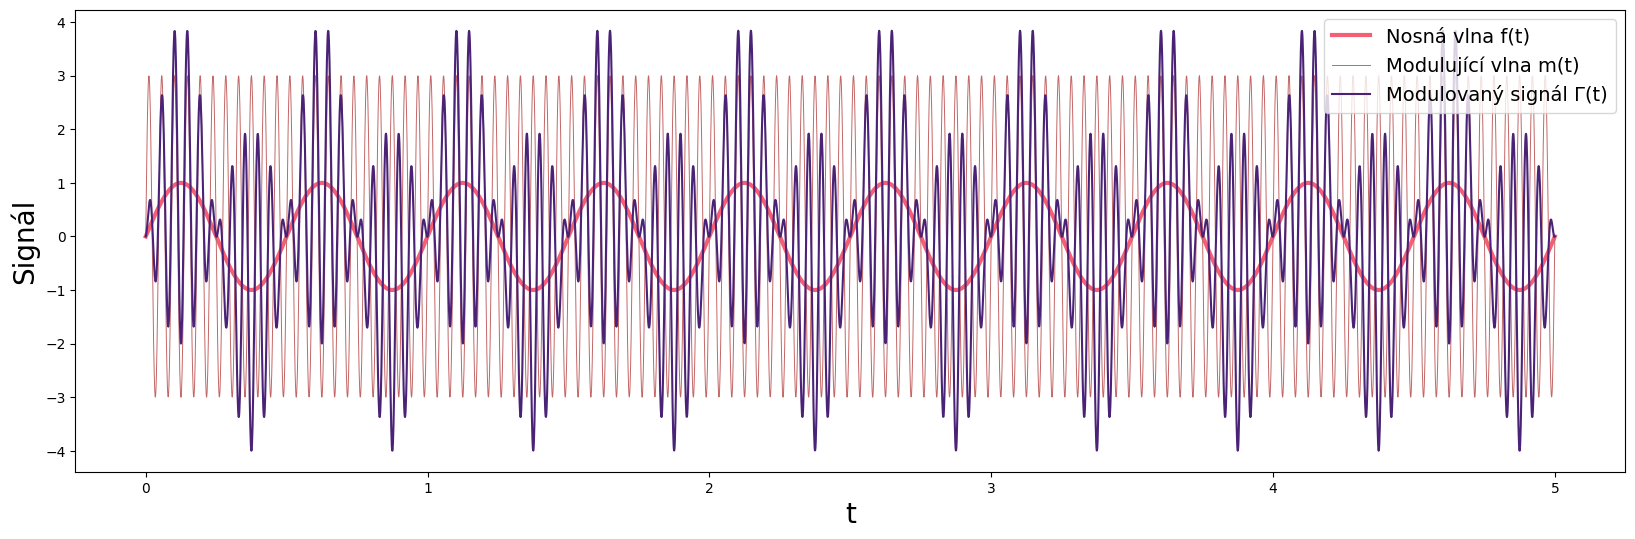

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


### Parametry
## A_0 - amplituda nosné vlny
## f - frekvence nosné vlny

## phi - frekvence modulující vlny
## M - amplituda modulující vlny

## n_length – počet vzorků
## time_vector – časový vektor


### Nosná vlna
## f(t) = A0 * sin(2πft)
def NosnaVlna(A0, f , n_length , time_vector):
    x = A0 * np.sin(2 * np.pi * f * time_vector)
    return np.array(x)

### Modulující vlna
## m(t) = M * sin(2πφt)
def ModulacniVlna(M, phi , n_length, time_vector):
    m = M * np.sin(2 * np.pi * phi * time_vector)
    return np.array(m)

### Konkrétní parametry nosné vlny
numT = 10;          # počet period nosné vlny (které chci vykreslit)
f = 2;              # frekvence nosné vlny (2 Hz) [s**-1]
A0 = 1;             # amplituda nosné vlny
T = 1/f;            # perioda nosné vlny [s] – 0.5 s
Tmax = numT*T;      # celková délka signálu – celkový časový úsek, který chci vykreslit [s] – 5 s
n_length = 5000;    # počet vzorků
time_vector_x = np.linspace(0, Tmax, n_length); # časový vektor pro nosnou vlnu


### Konkrétní parametry modulující vlny
phi = 22; # frekvence modulující vlny (22 Hz) [s**-1]
M =3; # amplituda modulující vlny
T = 1/f; # perioda nosné vlny [s] – 0.5 s
Tmax = numT*T; # celková délka signálu – celkový časový úsek, který chci vykreslit [s] – 5 s
n_length = 5000; # počet vzorků
time_vector_m = np.linspace(0, Tmax, n_length); # časový vektor pro modulující vlnu

### Vygenerování nosné vlny s konkrétními hodnotami parametrů
x = NosnaVlna(A0, f, n_length, time_vector_x);

### Vygenerování modulující vlny s konkrétními hodnotami parametrů
m = ModulacniVlna(M, phi, n_length, time_vector_m)

### Vyge
# 
# nerování modulovaného signálu
y = NosnaVlna(A0+m, f, n_length, time_vector_m);

### Graf
plt.rcParams["figure.figsize"] = (20,6)
plt.plot(time_vector_x, x, linewidth = 3, color = "#f55f74", label="Nosná vlna f(t)");
plt.plot(time_vector_m, m, linewidth = 0.7, color = "#c46666", label="Modulující vlna m(t)");
plt.plot(time_vector_m, y, linewidth = 1.5, color = "#4a2377", label="Modulovaný signál Γ(t)");
plt.xlabel("t", fontsize = 20)
plt.ylabel("Signál", fontsize = 20)
plt.legend(fontsize=14, loc="upper right") 
plt.show()

## 2. Seminář

### Aliasing
Aliasing je zkreslení signálu, které vznikne, když vzorkujeme (měříme signál) příliš pomalu.
Počítač potom nedokáže správně rozpoznat původní tvar signálu a vypadá to, jako by měl jinou (nižší) frekvenci, než ve skutečnosti měl.

`tsig = np.linspace(0, t_max)` 

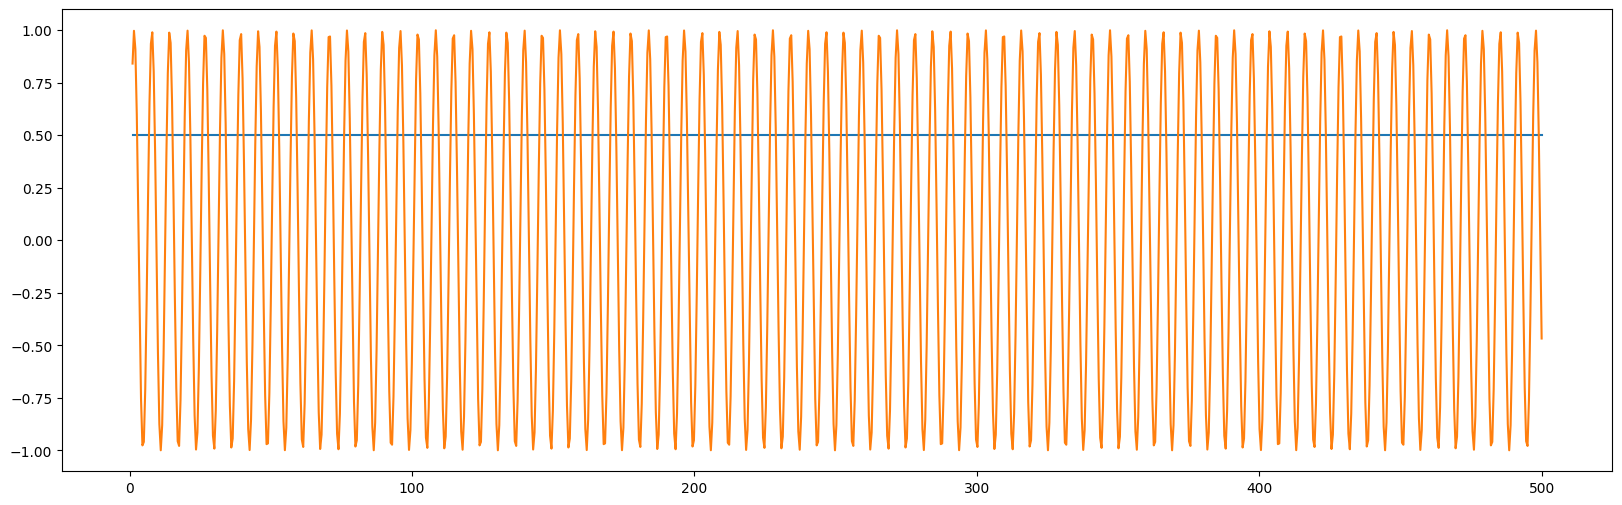

In [23]:
n_length = 500

tsig = np.linspace(1, n_length, 2*n_length)
xsig = np.zeros(2*n_length)

# konstanta 
xsig[:] = 0.5
plt.plot(tsig, xsig)

# vestavěná funkce
xsig = np.sin(tsig)
plt.plot(tsig, xsig)

# funkce 
def funkce(x):
    out = x*x
    return np.array(out)

#xsig = funkce(tsig)
#plt.plot(tsig, xsig)

## Generování periodických signálů

#### Funkce

- `t` – časové okamžiky (např. každou 1/1000 sekundy)
- `y` – hodnota signálu (např. napětí nebo intenzita v tom čase)

    - vytvoří časové pole t – pomocí np.arange(0, duration, 1/fs)
    - začni od 0, skonči za duration sekund, vzorkuj po krocích 1/fs sekund
    (např. fs=1000 → 1000 vzorků za sekundu)
    - spočítá hodnoty signálu y podle příslušného matematického tvaru
    - vrátí obě pole – return t, y
---
#### Signály
##### Sinusový signál
- Hladký, periodický průběh daný funkcí  `y(t) = A * sin(2πft)`  
- Typický pro zvukové a elektrické vlny (např. střídavé napětí).  
- Základní tvar všech ostatních signálů.
---
##### Obdélníkový signál
- Střídá dvě úrovně: `+A` a `−A`.  
- Má ostré přechody mezi stavy, připomíná zapnuto/vypnuto (`0` ↔ `1`).  
- Používá se v digitální elektronice.
---
##### Pilový (sawtooth) signál
- Lineárně roste a pak náhle spadne.  
- Vypadá jako zuby pily.  
- Používá se v oscilátorech, syntetizátorech a generátorech ramp.
---
##### Trojúhelníkový signál
- Lineárně roste i klesá – symetrický tvar.  
- Je plynulejší než obdélník, bez ostrých hran.  
- Vhodný pro testování filtrů nebo pro modulaci signálu.
---
##### Impulsní signál
- Řada krátkých špiček oddělených nulami.  
- Používá se k testování systémů (např. měření impulsní odezvy).  
- Matematicky odpovídá tzv. *Diracovu impulsu*.

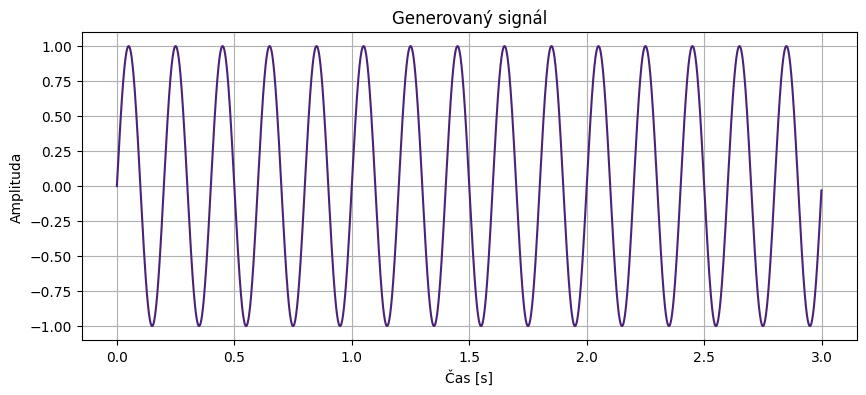

In [32]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

### Společný časový vektor
fs = 1000          # vzorkovací frekvence [Hz]
duration = 3      # délka signálu [s]
t = np.arange(0, duration, 1/fs)

## Sinusový signál
def sinus_signal(t, f=5, A=1):
    return A * np.sin(2 * np.pi * f * t)

## Čtvercový signál
def square_signal(t, f=5, A=1):
    return A * signal.square(2 * np.pi * f * t)

## Pilovitý signál
def sawtooth_signal(t, f=5, A=1):
    return A * signal.sawtooth(2 * np.pi * f * t)

## Trojúhelníkový signál
def triangle_signal(t, f=5, A=1):
    return A * signal.sawtooth(2 * np.pi * f * t, width=0.5)

## Impulsní signál
def impulse_signal(t, f=5, A=1, fs=1000):
    y = np.zeros_like(t)
    step = int(fs / f)
    y[::step] = A
    return y

### Generování signálu
y = sinus_signal(t, f=5, A=1)

## Vykreslení 
def plot_signal(t, y):
    plt.figure(figsize=(10, 4))
    plt.plot(t, y, color = "#4a2377")
    plt.title('Generovaný signál')
    plt.xlabel('Čas [s]')
    plt.ylabel('Amplituda')
    plt.grid(True)
    plt.show()

plot_signal(t, y)





# Charakteristiky signálu v časové oblasti
- perioda, amplituda, trend, práce signálu, energie
- modulace
- **Příznakový prostor** – prostor všech vlastností signálu (*Feature space*) – maximum, minimum atd.

### Energie signálu
Energie spojitého signálu x(t) je definována jako skalární součin signálu se sebou samým:

`Ec = <x(t), x(t)> = ∫_{-∞}^{∞} |x(t)|² dt`

kde:
- Ec ... celková energie signálu  
- x(t) ... spojitý časový signál  
- |x(t)|² ... okamžitý výkon signálu  
- integrál probíhá přes celý časový rozsah

Fyzikálně to odpovídá množství energie, kterou signál nese v čase.



In [ ]:
## Výpočet charakteristik 

### Minimum signálu
def signal_min(signal):
    return float(np.min(signal))

### Maximum signálu
def signal_max(signal):
    return float(np.max(signal))

### Střední hodnota signálu
def signal_mean(signal):
    return float(np.mean(signal))

### Amplituda signálu
def signal_amplitude(signal):
    return (np.max(signal) - np.min(signal)) / 2

### Energie signálu
def signal_energy(signal):
    return float(np.sum(signal**2))


### Výpočet a výpis charakteristik
min = signal_min(signal=y)
max = signal_max(signal=y)
print(f"<{min}, {max}>")

energie = signal_energy(signal=y)
print(f"Energie signálu: {energie}")


<-1.0, 1.0>
Energie signálu: 1500.0000000000002


---
Příště: konvoluce, korelace, kovariance

# 3. Konvoluce, kovariance, korelace

- metody zpracování signálu v časové oblasti

## Konvoluce signálu
*Konvoluce je způsob, jak z jednoho signálu nebo obrázku vytvořit nový tím, že na něj „přejíždíš“ malým okénkem čísel, které se nazývá konvoluční jádro. Na každé pozici vezmeš hodnoty ze signálu, vynásobíš je čísly z jádra, všechny výsledky sečteš a zapíšeš jeden nový bod do výstupu. Tímto posouváním a počítáním po celém signálu zjistíš, jak moc se tvar jádra „hodí“ k různým částem vstupu. V praxi se tím například rozostřují nebo zaostřují obrázky, detekují hrany, nebo se ve strojovém učení hledají různé rysy a tvary.*

- určuje odezvu signálu x[t] na impuls h[t]
- signál je reprezentován jako lineární systém
- značí se symbolem *
- **Využití**: grafické operace, strojové učení

### Spojitá definice
 = int -inf;inf ()

y(t)= x[t] * h[t] = ∫−∞∞ ​x(τ) . h(t−τ) dτ

### Diskrétní definice
x[k] * h[k] = y[k] -> x[k] * h[k] = k=−∞ ∑ ∞ ​x[k] . h[n−k]

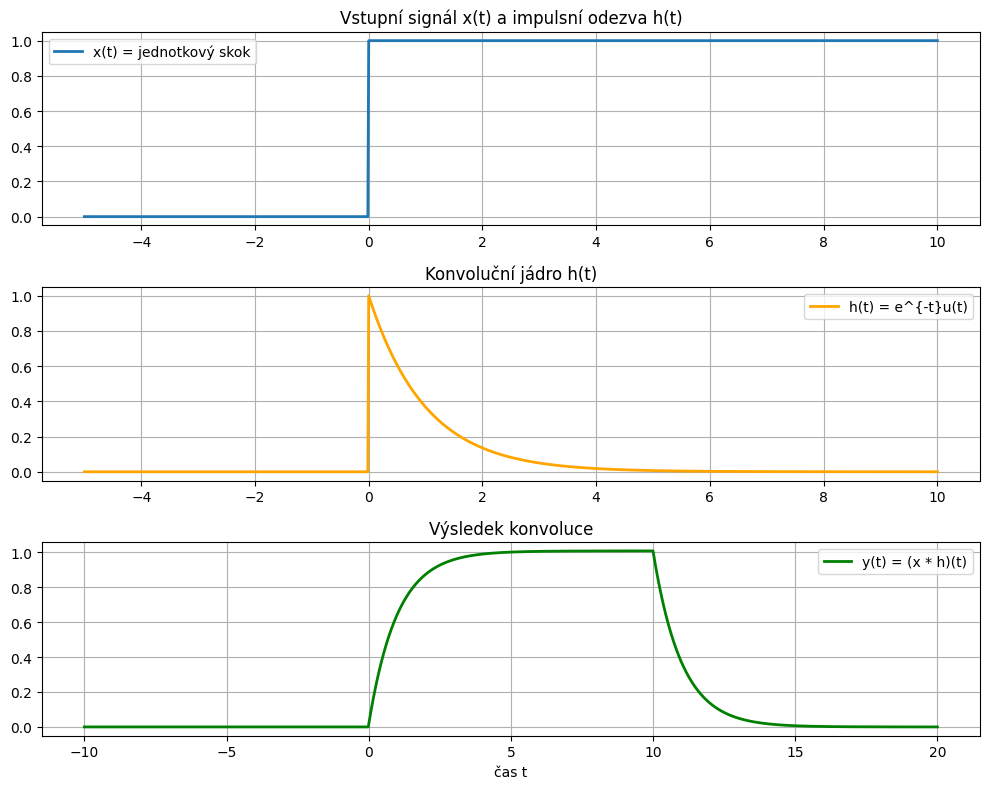

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Časová osa
t = np.linspace(-5, 10, 1000)

# Vstupní signál x(t): jednotkový skok
x = np.heaviside(t, 1)

# Impulsní odezva h(t): exponenciální pokles
h = np.exp(-t) * np.heaviside(t, 1)

# Výpočet konvoluce (spojitá forma - numericky přes diskrétní vzorky)
y = np.convolve(x, h, mode='full') * (t[1] - t[0])  # násobíme krokem dt
t_conv = np.linspace(2*t[0], 2*t[-1], len(y))

# --- Grafické znázornění ---
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x, label='x(t) = jednotkový skok', linewidth=2)
plt.grid(True)
plt.legend()
plt.title('Vstupní signál x(t) a impulsní odezva h(t)')

plt.subplot(3, 1, 2)
plt.plot(t, h, label='h(t) = e^{-t}u(t)', linewidth=2, color='orange')
plt.grid(True)
plt.legend()
plt.title("Konvoluční jádro h(t)")

plt.subplot(3, 1, 3)
plt.plot(t_conv, y, label='y(t) = (x * h)(t)', color='green', linewidth=2)
plt.grid(True)
plt.legend()
plt.xlabel('čas t')
plt.title('Výsledek konvoluce')

plt.tight_layout()
plt.show()


### Vygenerujte obdélníkový signál s periodou i amplitudou 1 a proveďte jeho konvoluci s funkcí h(t) = alpha * e ^ -alpha*t 

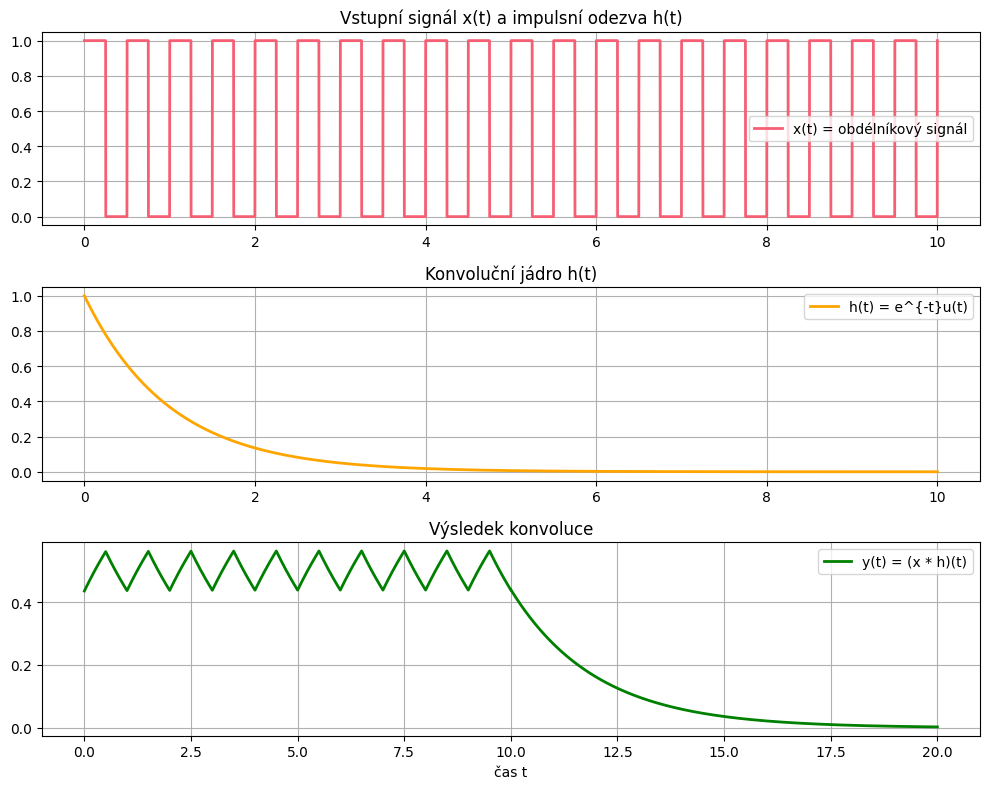

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal  
                 
# Časová osa
t = np.linspace(0, 10, 1000)
# Vstupní signál x(t): obdélníkový signál S PERIODOU POUZE 1 
## Čtvercový signál
def rectangular_signal(period=1.0, amplitude=1.0, duration=10.0, samples=10000, offset=0.0):
    """
    Generuje obdélníkový (čtvercový) signál s danou periodou a amplitudou.

    Parameters
    ----------
    period : float
        Perioda signálu [s]. Frekvence f = 1/period.
    amplitude : float
        Amplituda signálu (maximální kladná hodnota).
    duration : float
        Celková délka signálu [s].
    samples : int
        Počet vzorků signálu (rozlišení).
    offset : float
        Posun signálu (např. 0 → mezi -A a +A, 1 → mezi 0 a 2A/atd.).

    Returns
    -------
    t : ndarray
        Časová osa.
    x : ndarray
        Generovaný obdélníkový signál.
    """

    t = np.linspace(0, duration, samples)
    f = 1.0 / period
    x = amplitude * signal.square(2 * np.pi * f * t) + offset
    return t, x


# 1) Klasický obdélník ±1, perioda 1 s
t, x = rectangular_signal(period=1, amplitude=1)

# 2) Obdélník mezi 0 a 1
t, x = rectangular_signal(period=0.5, amplitude=0.5, offset=0.5)

# 3) Použití v konvoluci
alpha = 1
h = alpha * np.exp(-alpha * t) * np.heaviside(t, 1)
y = np.convolve(x, h, mode='same') * (t[1] - t[0])
t_conv = np.linspace(2*t[0], 2*t[-1], len(y))



# --- Grafické znázornění ---
plt.figure(figsize=(10, 8))         
plt.subplot(3, 1, 1)
plt.plot(t, x, label='x(t) = obdélníkový signál', linewidth=2, color='#f55f74')
plt.grid(True)
plt.legend()
plt.title('Vstupní signál x(t) a impulsní odezva h(t)')
plt.subplot(3, 1, 2)    
plt.plot(t, h, label='h(t) = e^{-t}u(t)', linewidth=2, color='orange')
plt.grid(True)
plt.legend()
plt.title("Konvoluční jádro h(t)")
plt.subplot(3, 1, 3)
plt.plot(t_conv, y, label='y(t) = (x * h)(t)', color='green', linewidth=2)
plt.grid(True)
plt.legend()
plt.xlabel('čas t')
plt.title('Výsledek konvoluce')
plt.tight_layout()
plt.show()

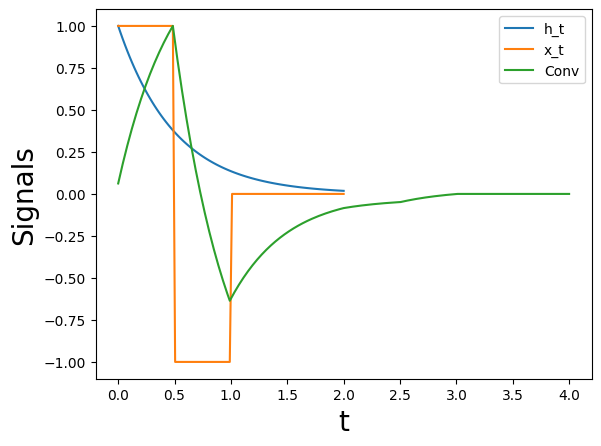

In [13]:
import scipy as sp

## Konvoluční jádro
def Kernel(alpha, tvec, a):
    h_t = alpha* np.exp(-a*tvec)
    return np.array(h_t)

## Parametry
n_length = 100
tvec = np.linspace(0, 2, n_length, endpoint=True)
h_t = Kernel(1.0, tvec, 2.0)

## One period of square wave in range (0;1))
## Generování signálu x(t) - čtvercový signál s periodou 1, který je 0 pro t >= 1
x_t = sp.signal.square(2 * np.pi * 1 * tvec);
x_t = np.where(tvec >= 1, 0, x_t)

plt.plot(tvec, h_t, label="h_t")
plt.plot(tvec, x_t, label="x_t")


## Konvoluce signálů 
Conv = np.convolve(x_t, h_t, mode='full') 
Conv = Conv/np.max(Conv)
t_conv = np.linspace(0,4, np.max(Conv.shape))

plt.plot(t_conv, Conv, label="Conv")
plt.xlabel("t", fontsize=20)
plt.ylabel("Signals", fontsize = 20)
plt.legend()
plt.show()

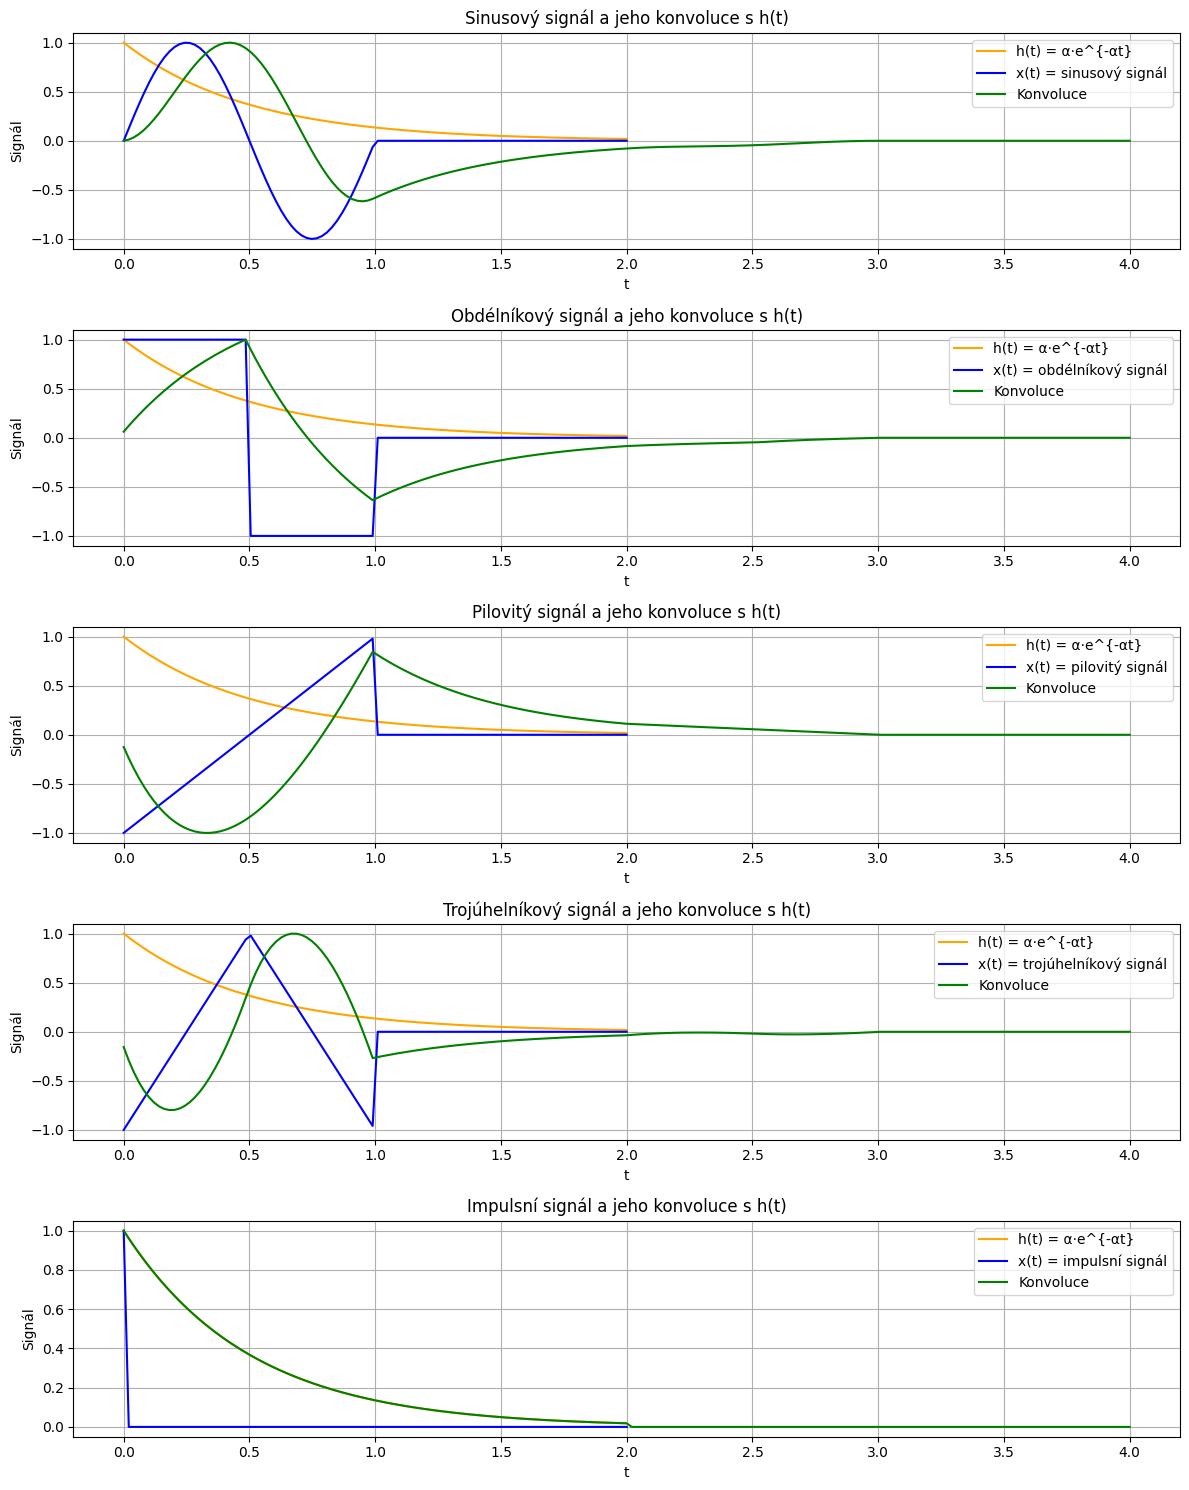

In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Funkce konvolučního jádra
def Kernel(alpha, tvec, a):
    h_t = alpha * np.exp(-a * tvec)
    return np.array(h_t)

## Parametry
n_length = 100
tvec = np.linspace(0, 2, n_length, endpoint=True)
h_t = Kernel(1.0, tvec, 2.0)

## Generování různých signálů x(t)
def gen_signals(tvec):
    signals = {}
    signals["Sinusový"] = np.sin(2 * np.pi * 1 * tvec)
    signals["Obdélníkový"] = sp.signal.square(2 * np.pi * 1 * tvec)
    signals["Pilovitý"] = sp.signal.sawtooth(2 * np.pi * 1 * tvec)
    signals["Trojúhelníkový"] = sp.signal.sawtooth(2 * np.pi * 1 * tvec, width=0.5)

    # Impulsní – jeden impuls v intervalu (0,1)
    imp = np.zeros_like(tvec)
    imp[0] = 1
    signals["Impulsní"] = imp
    return signals
signals = gen_signals(tvec)

## Vynulování signálů pro t >= 1
for key in signals:
    signals[key] = np.where(tvec >= 1, 0, signals[key])

## Grafické znázornění
plt.figure(figsize=(12, 15))

for i, (name, x_t) in enumerate(signals.items()):
    # Konvoluce a normalizace
    Conv = np.convolve(x_t, h_t, mode='full')
    Conv = Conv / np.max(np.abs(Conv))
    t_conv = np.linspace(0, 4, np.max(Conv.shape))
    plt.subplot(5, 1, i + 1)
    plt.plot(tvec, h_t, label="h(t) = α·e^{-αt}", color='orange')
    plt.plot(tvec, x_t, label=f"x(t) = {name.lower()} signál", color='blue')
    plt.plot(t_conv, Conv, label="Konvoluce", color='green')
    plt.title(f"{name} signál a jeho konvoluce s h(t)")
    plt.xlabel("t")
    plt.ylabel("Signál")
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()



| Signál                        | Co konvoluce ukazuje                                   |
| :---------------------------- | :----------------------------------------------------- |
| **Sinusový**                  | Výstup zpožděný a utlumený – systém má „paměť“.        |
| **Obdélníkový**               | Ostré hrany se vyhladí – systém reaguje pomalu.        |
| **Pilovitý / trojúhelníkový** | Výstup je zaoblený – systém filtruje vysoké frekvence. |
| **Impulsní**                  | Výstup = h(t) – základní odezva systému.               |


### Odhadni původní (hladký signál)

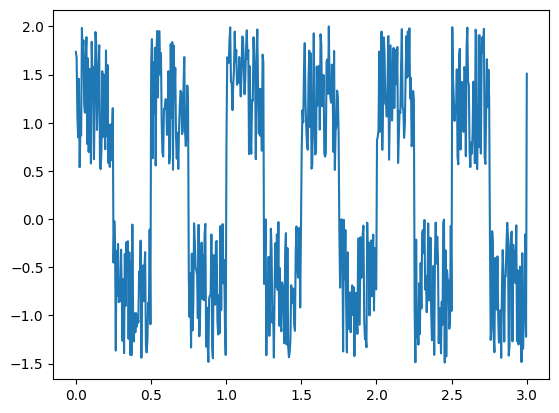

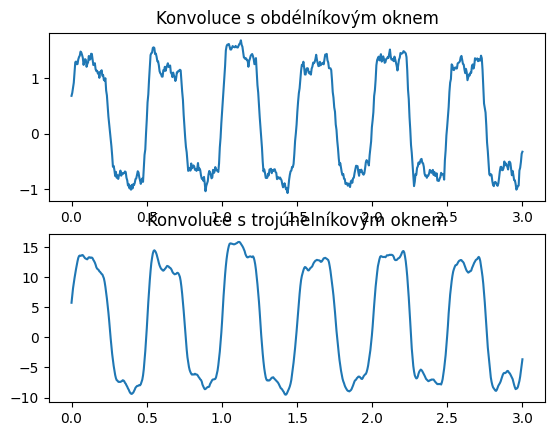

In [ ]:
## Generování čtvercového signálu s šumem
n_length = 500 # počet vzorků
Amp = 1.0 # amplituda šumu
numT = 6 # počet period
f = 2 # frekvence nosné vlny
A0 = 1.0 # amplituda nosné vlny
T= 1/f # perioda nosné vlny
Tmax = numT*T # celková délka signálu
n_length = numT * 100 # počet vzorků

## Časový vektor
tvec = np.linspace(0, Tmax, n_length, endpoint=True)

## Generování šumu a čtvercového signálu s šumem
Err = 3 * np.random.rand(n_length) - 1
x_t = sp.signal.square(2 * np.pi * f * tvec) + Amp*Err/2

plt.plot(tvec, x_t)
plt.show()

##  měli jsme udělat konvoluci s obélníkem a trojúhelníkem a porovnat výsledky v 1 grafu, exponenciála nefunguje
## signál je periodický 